# Scraped Cargoes API Example

## Run this example in [Colab](https://colab.research.google.com/github/SignalOceanSdk/SignalSDK/blob/master/docs/examples/jupyter/ScrapedCargoesAPI/Scraped%20Cargoes%20API%20Example.ipynb)

Get your personal Signal Ocean API subscription key (acquired [here](https://apis.signalocean.com/profile)) and replace it below:

In [1]:
signal_ocean_api_key = '' # Replace with your subscription key

# Scraped Cargoes API

The goal of Scraped Cargoes API is to collect and return scraped cargoes by the given filters or cargo IDs. This can be done by using the `ScrapedCargoesAPI` class and calling appropriate methods

#### 1. Request by filters

Cargoes can be retrieved for specific filters, by calling the `get_cargoes` method with the following arguments:

#### Required

`vessel_type` The vessel type

_Additionally, at least one of the following is required_

`message_ids` List of MessageIDs

`external_message_ids` List of ExternalMessageIDs

`received_date_from` Earliest date the cargo received

`received_date_to` Latest date the cargo received

`updated_date_from` Earliest date the cargo updated

`updated_date_to` Latest date the cargo updated

> Mixing received and updated dates is not allowed

> It's highly recommended to use UTC  dates, since this is the internally used format


#### 2. Request by cargo IDs

Cargoes can be retrieved for specific cargo IDs, by calling the `get_cargoes_by_cargo_ids` method with the following argument:

#### Required

`cargo_ids` A list of cargo ids to retrieve

### Additional optional arguments

Both methods, also accept the following optional arguments:

`include_details` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
parsed_part_id, line_from, line_to, in_line_order, source
```

`include_scraped_fields` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
scraped_laycan, scraped_load, scraped_load2, scraped_discharge, scraped_discharge_options, scraped_discharge2, scraped_charterer, scraped_cargo_type, scraped_quantity, scraped_delivery_date, scraped_delivery_from, scraped_delivery_to, 
scraped_redelivery_from, scraped_redelivery_to
```

`include_labels` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
load_name, load_taxonomy, load_name2, load_taxonomy2, discharge_name, discharge_taxonomy, discharge_name2, discharge_taxonomy2, charterer, cargo_type, cargo_type_group, delivery_from_name, delivery_from_taxonomy, delivery_to_name, delivery_to_taxonomy, redelivery_from_name, redelivery_from_taxonomy, redelivery_to_name, redelivery_to_taxonomy, charter_type, cargo_status
```

`include_content` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
content
```

`include_sender` If this field is `True` the following columns will be included in the response (otherwise they will be `None`): 
```
sender
```

`include_debug_info` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
is_private
```

> Default value is `True` for the arguments described above 

## Installation

To install _Signal Ocean SDK_, simply run the following command

In [2]:
%%capture
%pip install signal-ocean

## Quickstart

Import `signal-ocean` and other modules required for this demo

In [3]:
from signal_ocean import Connection
from signal_ocean.scraped_cargoes import ScrapedCargoesAPI, ScrapedCargo

from datetime import datetime, timedelta
import pandas as pd
import plotly.graph_objects as go

Create a new instance of the `ScrapedCargoesAPI` class

In [4]:
connection = Connection(signal_ocean_api_key)
api = ScrapedCargoesAPI(connection)

Now you are ready to retrieve your data

#### Request by date

To get all tanker cargoes received the last 4 days, you must declare appropriate `vessel_type` and `received_date_from` variables

In [5]:
vessel_type = 1  # Tanker
received_date_from = datetime.utcnow() - timedelta(days=4)

And then call `get_cargoes` method, as below

In [6]:
scraped_cargoes = api.get_cargoes(
    vessel_type=vessel_type,
    received_date_from=received_date_from,
)

next(iter(scraped_cargoes), None)

ScrapedCargo(cargo_id=33490561, message_id=47247133, external_message_id=None, parsed_part_id=58302943, line_from=66, line_to=66, in_line_order=None, source='Email', updated_date=datetime.datetime(2023, 9, 11, 16, 44, 36, tzinfo=datetime.timezone.utc), received_date=datetime.datetime(2023, 9, 11, 16, 43, 41, tzinfo=datetime.timezone.utc), is_deleted=False, scraped_laycan='04-05/10', laycan_from=datetime.datetime(2023, 10, 4, 0, 0, tzinfo=datetime.timezone.utc), laycan_to=datetime.datetime(2023, 10, 5, 0, 0, tzinfo=datetime.timezone.utc), scraped_load='brazil', load_geo_id=38, load_name='Brazil', load_taxonomy_id=3, load_taxonomy='Country', scraped_load2=None, load_geo_id2=None, load_name2=None, load_taxonomy_id2=None, load_taxonomy2=None, scraped_discharge='uswc', scraped_discharge_options=None, discharge_geo_id=24741, discharge_name='US West Coast', discharge_taxonomy_id=4, discharge_taxonomy='Level0', scraped_discharge2=None, discharge_geo_id2=None, discharge_name2=None, discharge_ta

For better visualization, it's convenient to insert data into a DataFrame

In [7]:
df = pd.DataFrame(scraped_cargoes)

df.head()

,cargo_id,message_id,external_message_id,parsed_part_id,line_from,line_to,in_line_order,source,updated_date,received_date,...,redelivery_to_taxonomy_id,redelivery_to_taxonomy,charter_type_id,charter_type,cargo_status_id,cargo_status,content,subject,sender,is_private
0,33490561,47247133,None,58302943,66,66,NaN,Email,2023-09-11 16:44:36+00:00,2023-09-11 16:43:41+00:00,...,None,None,0,Voyage,NaN,None,petrobras 260 brazil/uswc 04-05/10,SIMPSON | SPENCE | YOUNG LONDON VLCC COB REPOR...,SSY,False
1,33490687,47247239,None,58303014,103,103,2.0,Email,2023-09-11 16:46:52+00:00,2023-09-11 16:45:32+00:00,...,None,None,0,Voyage,NaN,None,eni 37kt ref+ums italy/ukc-ta-ecc-wafr off 18-20,SIMPSON SPENCE YOUNG CLEAN WEST REPORT - 11TH ...,SSY,False
2,33490688,47247239,None,58303014,103,103,NaN,Email,2023-09-11 16:46:52+00:00,2023-09-11 16:45:32+00:00,...,None,None,0,Voyage,NaN,None,eni 37kt ref+ums italy/ukc-ta-ecc-wafr off 18-20,SIMPSON SPENCE YOUNG CLEAN WEST REPORT - 11TH ...,SSY,False
3,33490689,47247239,None,58303014,31,31,2.0,Email,2023-09-11 16:46:52+00:00,2023-09-11 16:45:32+00:00,...,None,None,0,Voyage,NaN,None,prax 30kt nap+ums immingham ukc-med-waf off 17-19,SIMPSON SPENCE YOUNG CLEAN WEST REPORT - 11TH ...,SSY,False
4,33490690,47247239,None,58303014,31,31,NaN,Email,2023-09-11 16:46:52+00:00,2023-09-11 16:45:32+00:00,...,None,None,0,Voyage,NaN,None,prax 30kt nap+ums immingham ukc-med-waf off 17-19,SIMPSON SPENCE YOUNG CLEAN WEST REPORT - 11TH ...,SSY,False


#### Request by Message or ExternalMessage IDs

To retrieve cargoes for particular message ID(s), you should include an extra parameter called `message_ids` when using the `get_cargoes` method. This parameter should contain a list of message IDs. For instance,

In [8]:
message_ids = [47502652, 47503150, 47528120]
scraped_cargoes_by_message_ids = api.get_cargoes(
    vessel_type=vessel_type,
    message_ids=message_ids,
)

next(iter(scraped_cargoes_by_message_ids), None)

ScrapedCargo(cargo_id=33640251, message_id=47502652, external_message_id=None, parsed_part_id=58483539, line_from=35, line_to=35, in_line_order=None, source='Email', updated_date=datetime.datetime(2023, 9, 15, 3, 10, 17, tzinfo=datetime.timezone.utc), received_date=datetime.datetime(2023, 9, 15, 3, 7, 42, tzinfo=datetime.timezone.utc), is_deleted=False, scraped_laycan='27-sep', laycan_from=datetime.datetime(2023, 9, 27, 0, 0, tzinfo=datetime.timezone.utc), laycan_to=datetime.datetime(2023, 9, 27, 0, 0, tzinfo=datetime.timezone.utc), scraped_load='nigeria', load_geo_id=171, load_name='Nigeria', load_taxonomy_id=3, load_taxonomy='Country', scraped_load2=None, load_geo_id2=None, load_name2=None, load_taxonomy_id2=None, load_taxonomy2=None, scraped_discharge='ukcm', scraped_discharge_options=None, discharge_geo_id=25025, discharge_name='Mediterranean / UK Continent', discharge_taxonomy_id=6, discharge_taxonomy='Level2', scraped_discharge2=None, discharge_geo_id2=None, discharge_name2=None,

You can achieve a similar result for external message IDs by providing an argument called `external_message_ids`.

#### Request by Cargo IDs

To get data for specific cargo ID(s), you must call the `get_cargoes_by_cargo_ids` method for a list of desired cargo ID(s)

Date arguments are not available in this method

In [9]:
cargo_ids = [23780101, 23799896, 23799890, 23799892, 23790303]    # Or add a list of your desired cargo IDs

scraped_cargoes_by_ids = api.get_cargoes_by_cargo_ids(
    cargo_ids=cargo_ids,
)

df_by_ids = pd.DataFrame(scraped_cargoes_by_ids)
df_by_ids.head()

,cargo_id,message_id,external_message_id,parsed_part_id,line_from,line_to,in_line_order,source,updated_date,received_date,...,redelivery_to_taxonomy_id,redelivery_to_taxonomy,charter_type_id,charter_type,cargo_status_id,cargo_status,content,subject,sender,is_private
0,23790303,30829741,None,45820017,494,494,None,Email,2022-11-18 08:39:59+00:00,2022-11-18 00:00:00+00:00,...,None,None,0,Voyage,None,None,exxon 145 26-27 nov usg/ukcm - firm 2nd cargo ...,SUEZMAX MORNING UPDATE FROM SIMPSON SPENCE YOUNG,SSY,False
1,23799890,30842695,None,45831137,110,110,None,Email,2022-11-18 12:31:38+00:00,2022-11-18 00:00:00+00:00,...,None,None,0,Voyage,None,None,ioc 130 22-23 dec greater plutonio/paradip - q...,AFTERNOON SUEZMAX FIXTURE REPORT FROM SIMPSON ...,SSY,False
2,23799892,30842695,None,45831137,100,100,None,Email,2022-11-18 12:31:38+00:00,2022-11-18 00:00:00+00:00,...,None,None,0,Voyage,None,None,cnr 140 ely dec basrah/west - rumoured,AFTERNOON SUEZMAX FIXTURE REPORT FROM SIMPSON ...,SSY,False
3,23799896,30842695,None,45831137,108,108,None,Email,2022-11-18 12:31:38+00:00,2022-11-18 00:00:00+00:00,...,None,None,0,Voyage,None,None,repsol 130 11-12 dec wafr/ukcm - firm,AFTERNOON SUEZMAX FIXTURE REPORT FROM SIMPSON ...,SSY,False
4,23780101,30814158,None,45808575,69,69,None,Email,2022-11-18 03:48:04+00:00,2022-11-18 03:44:48+00:00,...,None,None,0,Voyage,None,None,houston ref 70-145 ecmex/usg 27-29/11,SIMPSON SPENCE YOUNG SINGAPORE SUEZMAX REPORT ...,SSY,False


#### Usage of optional arguments

By default, all fields are returned. In many cases, it is convenient to select specific columns. For example, if we want to compare scraped and mapped fields

In [10]:
scraped_mapped_columns = [
    'scraped_charterer',
    'charterer',
    'scraped_quantity',
    'quantity',
    'scraped_load',
    'load_name',
]

scraped_mapped_df = pd.DataFrame(scraped_cargoes, columns=scraped_mapped_columns)

scraped_mapped_df.head()

,scraped_charterer,charterer,scraped_quantity,quantity,scraped_load,load_name
0,petrobras,Petrobras,260,260000.0,brazil,Brazil
1,eni,ENI,37kt,37000.0,italy,Italy
2,eni,ENI,37kt,37000.0,italy,Italy
3,prax,Prax Petroleum,30kt,30000.0,immingham,Immingham
4,prax,Prax Petroleum,30kt,30000.0,immingham,Immingham


## Examples

Let's start by fetching all tanker cargoes received the last 2 weeks

In [11]:
example_vessel_type = 1  # Tanker
example_date_from = datetime.utcnow() - timedelta(days=14)

example_scraped_cargoes = api.get_cargoes(
   vessel_type=example_vessel_type,
   received_date_from=example_date_from,
)

#### Exclude deleted scraped cargoes

The `is_deleted` property of a scraped cargo indicates whether it is valid or not. If it is set to `True`, the corresponding `cargo_id` has been replaced by a new one.

For the sake of completeness, we will exclude deleted scraped cargoes in the following examples

In [12]:
example_scraped_cargoes = [cargo for cargo in example_scraped_cargoes if not cargo.is_deleted]

next(iter(example_scraped_cargoes), None)

ScrapedCargo(cargo_id=33228070, message_id=46751670, external_message_id=None, parsed_part_id=57945412, line_from=37, line_to=37, in_line_order=None, source='Email', updated_date=datetime.datetime(2023, 9, 4, 2, 58, 11, tzinfo=datetime.timezone.utc), received_date=datetime.datetime(2023, 9, 4, 2, 56, 19, tzinfo=datetime.timezone.utc), is_deleted=False, scraped_laycan='14-sep', laycan_from=datetime.datetime(2023, 9, 14, 0, 0, tzinfo=datetime.timezone.utc), laycan_to=datetime.datetime(2023, 9, 14, 0, 0, tzinfo=datetime.timezone.utc), scraped_load='usg', load_geo_id=24676, load_name='US Gulf', load_taxonomy_id=4, load_taxonomy='Level0', scraped_load2=None, load_geo_id2=None, load_name2=None, load_taxonomy_id2=None, load_taxonomy2=None, scraped_discharge='ukcm', scraped_discharge_options=None, discharge_geo_id=25025, discharge_name='Mediterranean / UK Continent', discharge_taxonomy_id=6, discharge_taxonomy='Level2', scraped_discharge2=None, discharge_geo_id2=None, discharge_name2=None, dis

Now, we are ready to insert our data into a dataframe and keep only specific fields

In [13]:
example_columns = [
    'charterer',   
    'laycan_from',
    'load_name',
    'quantity',
    'is_deleted',
]

data = pd.DataFrame(example_scraped_cargoes, columns=example_columns)

data.head()

,charterer,laycan_from,load_name,quantity,is_deleted
0,BP,2023-09-14 00:00:00+00:00,US Gulf,145000.0,False
1,CSSA,2023-09-20 00:00:00+00:00,Africa Atlantic Coast,130000.0,False
2,ExxonMobil,2023-09-16 00:00:00+00:00,Guyana,130000.0,False
3,ExxonMobil,2023-09-20 00:00:00+00:00,Africa Atlantic Coast,130000.0,False
4,BP,2023-10-12 00:00:00+00:00,US Gulf,NaN,False


#### Top 10 Charterers

In this example, we will find the top 10 Charterers, based on the number of distinct available cargoes

In [14]:
top_chrtr_ser = data[['charterer', 'laycan_from']].drop_duplicates().charterer.value_counts().head(10)

top_chrtr_df = top_chrtr_ser.to_frame(name='CargoCount').reset_index().rename(columns={'index': 'Charterer'})

top_chrtr_df

,Charterer,CargoCount
0,Vitol,9
1,BP,8
2,GCC BUNKERS,8
3,ENI,8
4,Unipec,7
5,CSSA,6
6,Equinor,6
7,Trafigura,5
8,Indian Oil,5
9,Petrobras,5


And display results in a bar plot

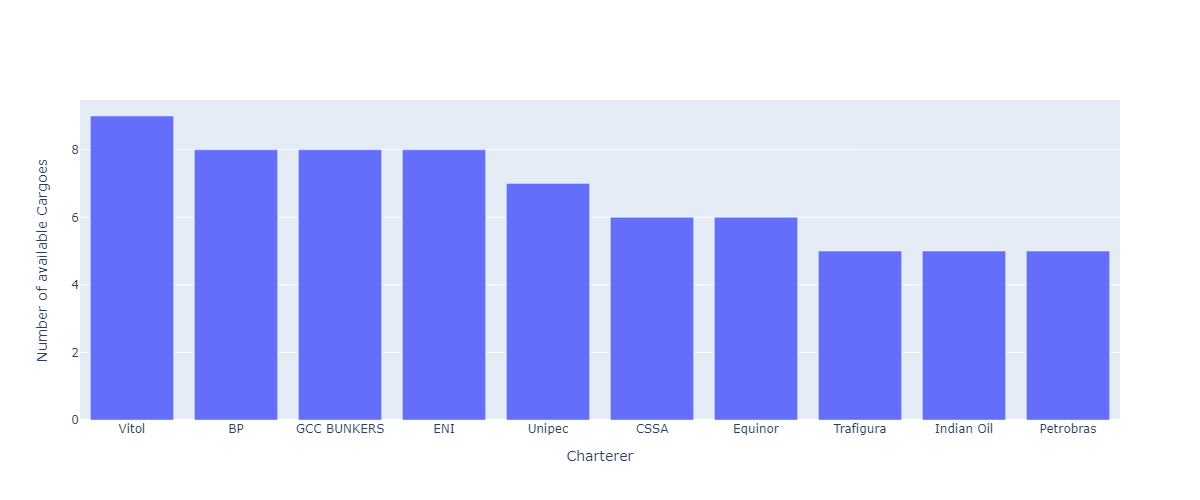

In [15]:
top_chrtr_fig = go.Figure()

bar = go.Bar(
    x=top_chrtr_df.Charterer.tolist(),
    y=top_chrtr_df.CargoCount.tolist(),
)

top_chrtr_fig.add_trace(bar)
top_chrtr_fig.update_xaxes(title_text="Charterer")
top_chrtr_fig.update_yaxes(title_text="Number of available Cargoes")
top_chrtr_fig.show()

#### Total quantity to load in specific areas per day the next week

In [16]:
this_week_days = pd.date_range(start=datetime.utcnow().date(), freq='D', periods=7, tz='UTC')
areas = data[data.load_name.notna()].load_name.value_counts().head().index.tolist()

areas

['Continent', 'Spain', 'US Gulf', 'Arabian Gulf', 'Africa Atlantic Coast']

Create the pivot table

In [17]:
areas_mask = data.load_name.isin(areas) & data.laycan_from.isin(this_week_days)

df_areas = data[areas_mask]

df_pivot = pd.pivot_table(
    df_areas,
    columns='load_name',
    index='laycan_from',
    values='quantity',
    aggfunc=pd.Series.sum,
    fill_value=0,
).reindex(index=this_week_days, fill_value=0).reset_index().rename(columns={'index': 'laycan_from'})

df_pivot

load_name,laycan_from,Africa Atlantic Coast,Arabian Gulf,Continent,Spain,US Gulf
0,2023-09-15 00:00:00+00:00,0,70000,0,0,0
1,2023-09-16 00:00:00+00:00,0,0,111000,0,0
2,2023-09-17 00:00:00+00:00,0,1120000,74000,0,1160000
3,2023-09-18 00:00:00+00:00,0,0,148000,60000,0
4,2023-09-19 00:00:00+00:00,0,0,0,296000,0
5,2023-09-20 00:00:00+00:00,650000,0,0,0,0
6,2023-09-21 00:00:00+00:00,0,0,0,888000,0


And display the results as timeseries

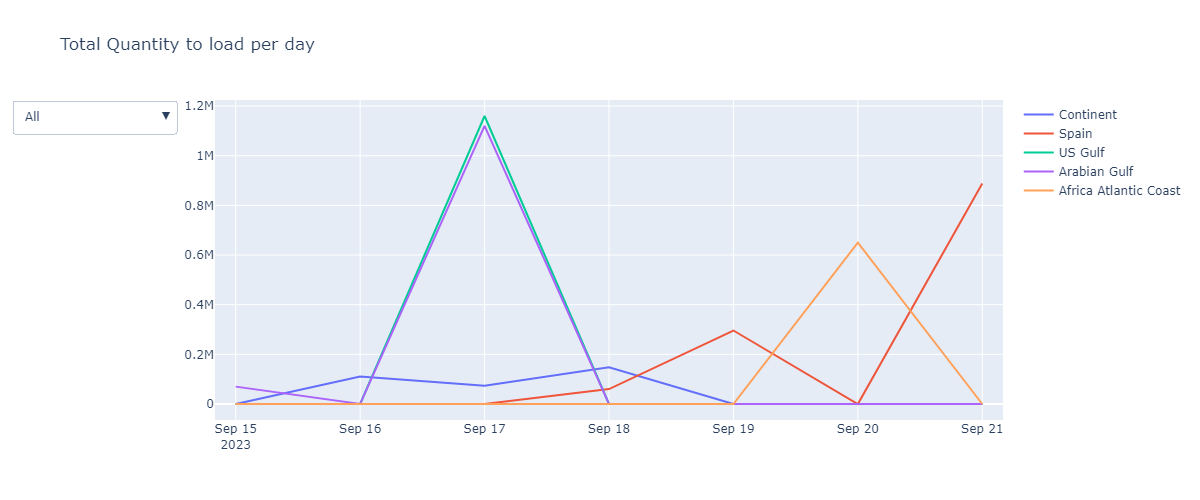

In [18]:
def area_button(area):
    args = [
        {'visible': [i == areas.index(area) for i in range(len(areas))]},
        {
            'title': f'Total Quantity to load in {area} per day',
            'showlegend': True
        },
    ]
    
    return dict(
        label=area,
        method='update',
        args=args,
    )

title = 'Total Quantity to load per day'
today = datetime.combine(datetime.utcnow().date(), datetime.min.time())

areas_fig = go.Figure()

area_buttons = []

for area in areas:
    if area not in df_pivot.columns:
        continue
    area_scatter_plot = go.Scatter(    
        x=df_pivot.laycan_from,
        y=df_pivot[area],
        name=area,
        mode='lines',
    )

    areas_fig.add_trace(area_scatter_plot)
    
    area_buttons.append(area_button(area))
    
buttons = list([
    dict(
        label='All',
        method='update',
        args=[    
            {'visible': [True for _ in range(len(areas))]},
            {
                'title': title,
                'showlegend': True
            }
        ],
    ),
    *area_buttons,
])

areas_fig.update_layout(
    title=title,
    updatemenus=[go.layout.Updatemenu(
        active=0,
        buttons=buttons,
    )],
    xaxis_range=[today - timedelta(hours=4), today + timedelta(hours=24*6 + 4)],
)

areas_fig.show()

#### Export data to csv

In [19]:
output_path = '' # Change output_path with your path
filename = 'last_two_weeks_cargoes.csv'
if not data.empty:
    data.to_csv(output_path+filename, index=False)